In [8]:
import pandas as pd
import numpy as np

rows = [
    ("Dylan & Daniella",  36, [8, 9, 10, 9]), 
    ("Alix & Val", 39, [10, 10, 9, 10]),
    ("Andy & Emma", 30, [7, 7, 9, 7]), 
    ("Whitney & Mark", 39, [9, 10, 10, 10]), 
    ("Daniele & Pasha", 34, [9, 8, 9, 8]), 
    ("Elaine & Alan", 37, [9, 9, 10, 9]), 
    ("Jordan & Ezra", 38, [10, 9, 10, 9]),
    ("Robert & Whitney", 38, [9, 9, 10, 10]) 
]

df = pd.DataFrame([
    {
        "Couple": name, "Total": total,
        "Carrie Ann": s[0], "Derek": s[1], "Flav": s[2], "Bruno": s[3]
    }
    for name, total, s in rows
])

judges = ["Carrie Ann", "Derek", "Flav", "Bruno"]
df

,Couple,Total,Carrie Ann,Derek,Flav,Bruno
0,Dylan & Daniella,36,8,9,10,9
1,Alix & Val,39,10,10,9,10
2,Andy & Emma,30,7,7,9,7
3,Whitney & Mark,39,9,10,10,10
4,Daniele & Pasha,34,9,8,9,8
5,Elaine & Alan,37,9,9,10,9
6,Jordan & Ezra,38,10,9,10,9
7,Robert & Whitney,38,9,9,10,10


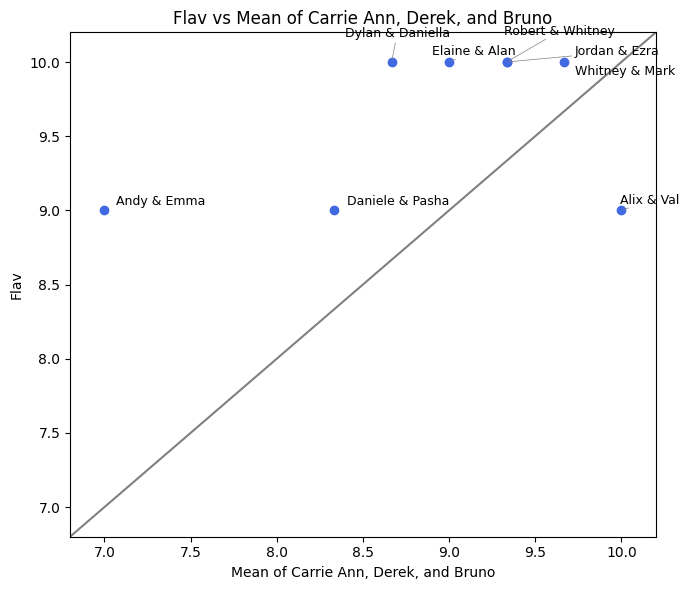

In [29]:
from adjustText import adjust_text
import matplotlib.pyplot as plt

df["Others_mean"] = df[["Carrie Ann", "Derek", "Bruno"]].mean(axis=1)

fig, ax = plt.subplots(figsize=(7,6))
ax.scatter(df["Others_mean"], df["Flav"], color="royalblue")


min_val = min(df["Others_mean"].min(), df["Flav"].min()) - 0.2
max_val = max(df["Others_mean"].max(), df["Flav"].max()) + 0.2
ax.plot([min_val, max_val], [min_val, max_val], color="gray", linestyle="-")

texts = [
    ax.text(row["Others_mean"], row["Flav"], row["Couple"], fontsize=9)
    for _, row in df.iterrows()
]

adjust_text(texts, arrowprops=dict(arrowstyle="-", color="gray", lw=0.5))

ax.set_title("Flav vs Mean of Carrie Ann, Derek, and Bruno")
ax.set_xlabel("Mean of Carrie Ann, Derek, and Bruno")
ax.set_ylabel("Flav")
ax.set_xlim(min_val, max_val) 
ax.set_ylim(min_val, max_val)
plt.tight_layout()
plt.show()

In [20]:
def cronbach_alpha(matrix: np.ndarray) -> float:
   
   x = np.asarray(matrix, dtype=float)
   k = x.shape[1]
   item_vars = x.var(axis=0, ddof=1)
   total_var = x.sum(axis=1).var(ddof=1)
   return (k / (k-1)) * (1-(item_vars.sum() / total_var))

def annotate_bars(ax):
   for p in ax.patches:
      height = p.get_height()
      ax.annotate(f"{height:.3f}",
                  (p.get_x() + p.get_width()/2, height),
                  ha='center', va='bottom', fontsize=9)

metrics = {}
for j in judges:
   others = [x for x in judges if x != j]
   diffs = df[j] - df[others].mean(axis=1)
   mae = float(diffs.abs().mean())
   rmse = float(np.sqrt((diffs**2).mean()))
   r = float(df[j].corr(df[others].mean(axis=1)))
   metrics[j] = {"MAE": mae, "RMSE": rmse, "Pearson r": r}

metrics_df = pd.DataFrame(metrics).T
metrics_df
      

,MAE,RMSE,Pearson r
Carrie Ann,0.708333,0.772802,0.649623
Derek,0.458333,0.513701,0.910170
Flav,0.958333,1.073675,0.416622
Bruno,0.458333,0.513701,0.905585


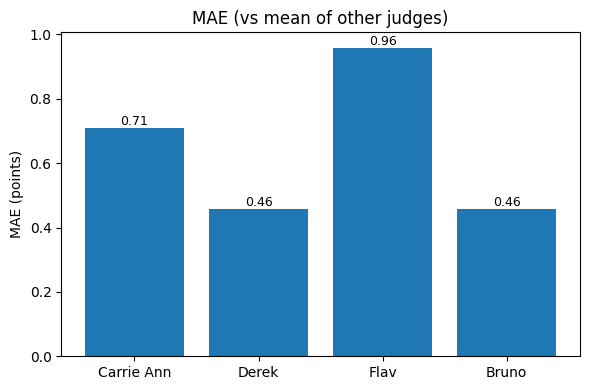

In [12]:
import matplotlib.ticker as mticker
fig, ax = plt.subplots(figsize=(6,4))
vals = [metrics[j]["MAE"] for j in judges]

bars = ax.bar(judges, vals)
ax.set_title("MAE (vs mean of other judges)")
ax.set_ylabel("MAE (points)")

ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f'))
for p in bars:
    h = p.get_height()
    ax.annotate(f"{h:.2f}",
                (p.get_x() + p.get_width()/2, h),
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

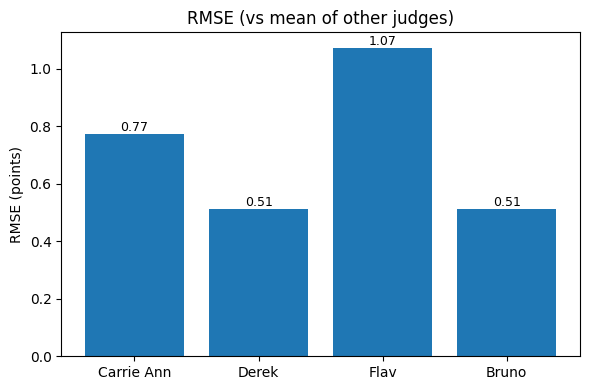

In [13]:
import matplotlib.ticker as mticker
fig, ax = plt.subplots(figsize=(6,4))
vals = [metrics[j]["RMSE"] for j in judges]

bars = ax.bar(judges, vals)
ax.set_title("RMSE (vs mean of other judges)")
ax.set_ylabel("RMSE (points)")

ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f'))
for p in bars:
    h = p.get_height()
    ax.annotate(f"{h:.2f}",
                (p.get_x() + p.get_width()/2, h),
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

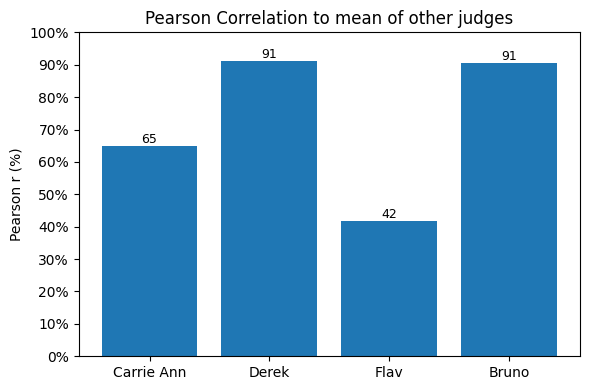

In [15]:
import numpy as np
import matplotlib.ticker as mticker
fig, ax = plt.subplots(figsize=(6,4))
vals = [metrics[j]["Pearson r"] for j in judges]

bars = ax.bar(judges, vals)
ax.set_title("Pearson Correlation to mean of other judges")
ax.set_ylabel("Pearson r (%)")

ax.set_ylim(0.0, 1.0)
ax.yaxis.set_major_locator(mticker.MultipleLocator(0.1))
ax.yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1, decimals=0))

for p in bars:
    h = p.get_height()
    ax.annotate(f"{h*100:.0f}",
                (p.get_x() + p.get_width()/2, h),
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


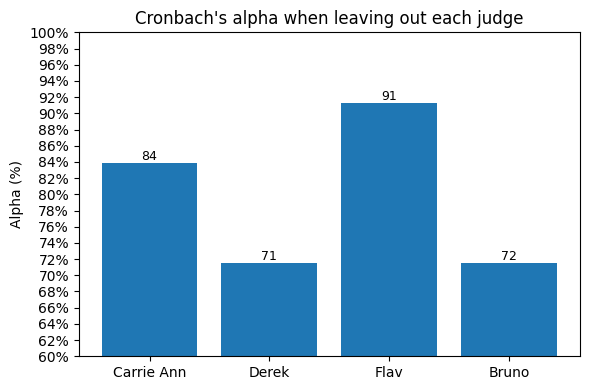

In [25]:
import matplotlib.ticker as mticker

fig, ax = plt.subplots(figsize=(6,4))
no_carrie = df[['Derek', 'Flav', 'Bruno']]
no_derek = df[['Carrie Ann', 'Flav', 'Bruno']]
no_flav = df[['Carrie Ann', 'Derek', 'Bruno']]
no_bruno = df[['Carrie Ann', 'Derek', 'Flav']]

vals = [cronbach_alpha(no_carrie), cronbach_alpha(no_derek), cronbach_alpha(no_flav), cronbach_alpha(no_bruno)]

bars = ax.bar(judges, vals)
ax.set_title("Cronbach's alpha when leaving out each judge")
ax.set_ylabel("Alpha (%)")

ax.set_ylim(0.6, 1.0)
ax.yaxis.set_major_locator(mticker.MultipleLocator(0.02))
ax.yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1, decimals=0))

for p in bars:
    h = p.get_height()
    ax.annotate(f"{h*100:.0f}",
                (p.get_x() + p.get_width()/2, h),
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()